
Training on sine function...
Epoch [100/1000], Loss: 0.0001, Test Loss: 0.0001
Epoch [200/1000], Loss: 0.0004, Test Loss: 0.0000
Epoch [300/1000], Loss: 0.0000, Test Loss: 0.0000
Epoch [400/1000], Loss: 0.0000, Test Loss: 0.0001
Epoch [500/1000], Loss: 0.0000, Test Loss: 0.0000
Epoch [600/1000], Loss: 0.0000, Test Loss: 0.0000
Epoch [700/1000], Loss: 0.0004, Test Loss: 0.0004
Epoch [800/1000], Loss: 0.0000, Test Loss: 0.0000
Epoch [900/1000], Loss: 0.0000, Test Loss: 0.0000
Epoch [1000/1000], Loss: 0.0000, Test Loss: 0.0000


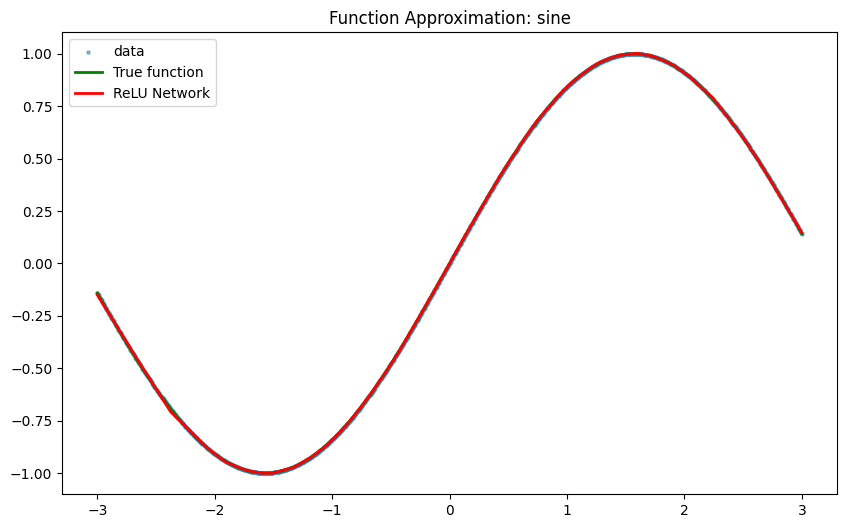

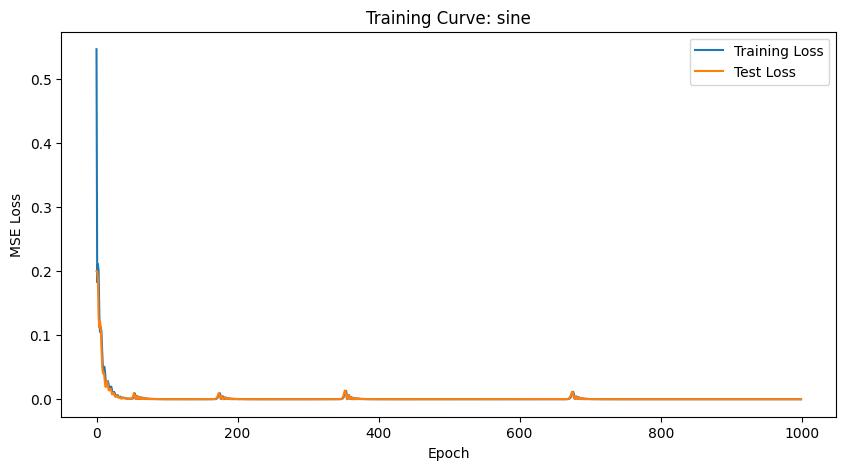


Training on poly function...
Epoch [100/1000], Loss: 0.4528, Test Loss: 0.2697
Epoch [200/1000], Loss: 0.0204, Test Loss: 0.0167
Epoch [300/1000], Loss: 0.0079, Test Loss: 0.0057
Epoch [400/1000], Loss: 0.0068, Test Loss: 0.0037
Epoch [500/1000], Loss: 0.0029, Test Loss: 0.0020
Epoch [600/1000], Loss: 0.0022, Test Loss: 0.0017
Epoch [700/1000], Loss: 0.0018, Test Loss: 0.0015
Epoch [800/1000], Loss: 0.0016, Test Loss: 0.0013
Epoch [900/1000], Loss: 0.0014, Test Loss: 0.0012
Epoch [1000/1000], Loss: 0.0014, Test Loss: 0.0012


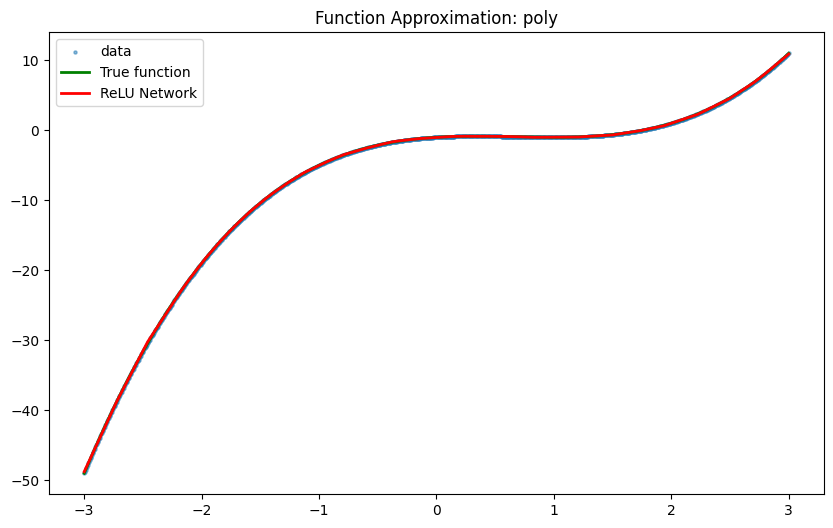

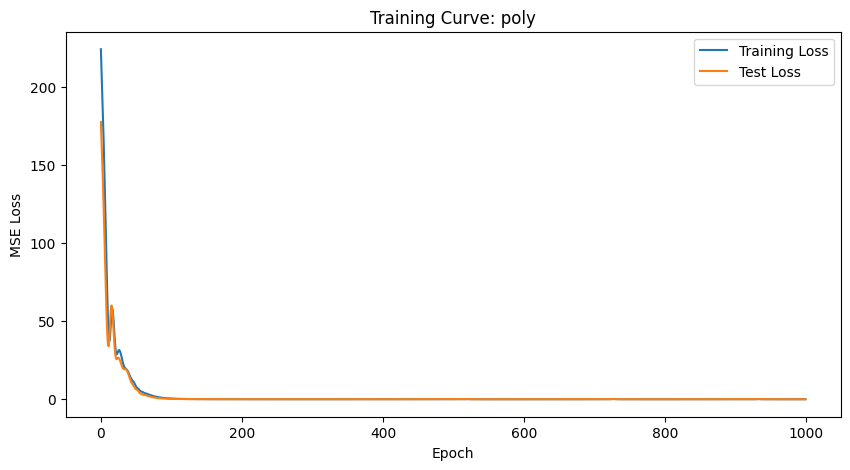


Training on piecewise function...
Epoch [100/1000], Loss: 0.0024, Test Loss: 0.0019
Epoch [200/1000], Loss: 0.0005, Test Loss: 0.0004
Epoch [300/1000], Loss: 0.0001, Test Loss: 0.0001
Epoch [400/1000], Loss: 0.0001, Test Loss: 0.0001
Epoch [500/1000], Loss: 0.0000, Test Loss: 0.0000
Epoch [600/1000], Loss: 0.0000, Test Loss: 0.0000
Epoch [700/1000], Loss: 0.0000, Test Loss: 0.0000
Epoch [800/1000], Loss: 0.0000, Test Loss: 0.0000
Epoch [900/1000], Loss: 0.0000, Test Loss: 0.0000
Epoch [1000/1000], Loss: 0.0000, Test Loss: 0.0000


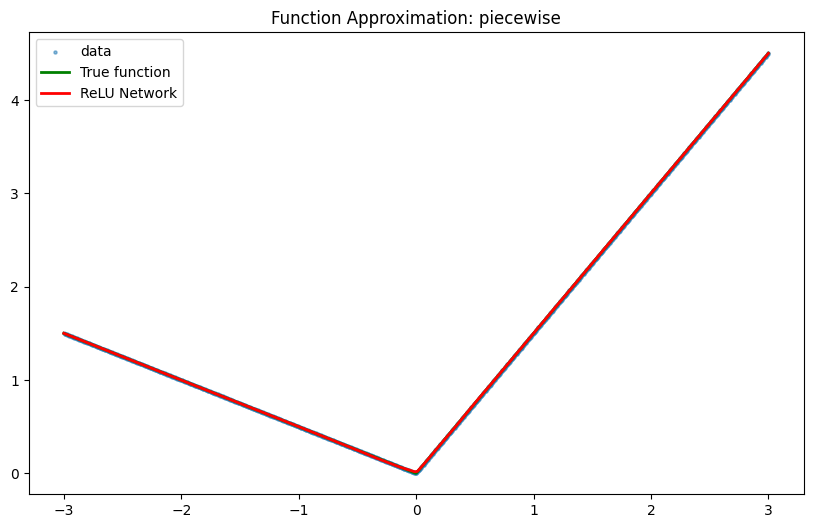

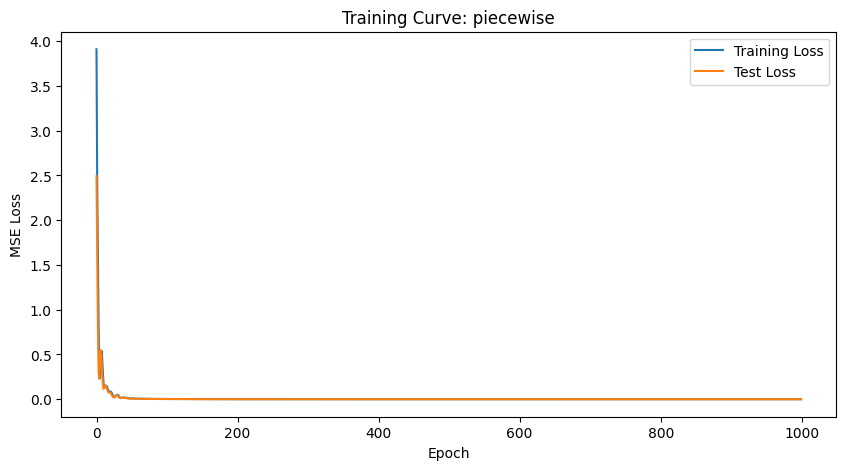

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split

# 定义目标函数
def target_func(x, func_name='sine'):
    if func_name == 'sine':
        return np.sin(x)
    elif func_name == 'poly':
        return x**3 - 2*x**2 + x - 1
    elif func_name == 'piecewise':
        return np.abs(x) + x/2
    else:
        raise ValueError("Unknown function name")

# 生成数据
def generate_data(func_name, n_samples=1000, noise_level=0.05):
    x = np.linspace(-3, 3, n_samples)
    y = target_func(x, func_name)
    # 添加噪声
    # y += noise_level * np.random.randn(n_samples)
    return x, y

# 定义ReLU网络
class ReLUNet(nn.Module):
    def __init__(self, hidden_size=64, num_layers=3):
        super(ReLUNet, self).__init__()
        layers = []
        layers.append(nn.Linear(1, hidden_size))
        layers.append(nn.ReLU())

        for _ in range(num_layers - 2):
            layers.append(nn.Linear(hidden_size, hidden_size))
            layers.append(nn.ReLU())

        layers.append(nn.Linear(hidden_size, 1))
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)

# 训练函数
def train_model(x, y, hidden_size=64, num_layers=3, epochs=1000, lr=0.01):
    # 转换为tensor
    x_tensor = torch.FloatTensor(x).unsqueeze(1)
    y_tensor = torch.FloatTensor(y).unsqueeze(1)

    # 划分训练测试集
    x_train, x_test, y_train, y_test = train_test_split(
        x_tensor, y_tensor, test_size=0.2, random_state=42)

    # 初始化模型
    model = ReLUNet(hidden_size, num_layers)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # 训练
    train_losses = []
    test_losses = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(x_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        # 记录损失
        train_losses.append(loss.item())
        with torch.no_grad():
            test_outputs = model(x_test)
            test_loss = criterion(test_outputs, y_test)
            test_losses.append(test_loss.item())

        if (epoch+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

    return model, train_losses, test_losses

# 可视化结果
def plot_results(x, y, model, func_name):
    x_tensor = torch.FloatTensor(x).unsqueeze(1)
    with torch.no_grad():
        y_pred = model(x_tensor).numpy().flatten()

    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, s=5, label='data', alpha=0.5)
    plt.plot(x, target_func(x, func_name), 'g-', linewidth=2, label='True function')
    plt.plot(x, y_pred, 'r-', linewidth=2, label='ReLU Network')
    plt.title(f'Function Approximation: {func_name}')
    plt.legend()
    plt.show()

# 主函数
def main():
    func_names = ['sine', 'poly', 'piecewise']
    for func_name in func_names:
        print(f"\nTraining on {func_name} function...")
        x, y = generate_data(func_name)
        model, train_losses, test_losses = train_model(x, y, hidden_size=64, num_layers=3)
        plot_results(x, y, model, func_name)

        # 绘制训练曲线
        plt.figure(figsize=(10, 5))
        plt.plot(train_losses, label='Training Loss')
        plt.plot(test_losses, label='Test Loss')
        plt.title(f'Training Curve: {func_name}')
        plt.xlabel('Epoch')
        plt.ylabel('MSE Loss')
        plt.legend()
        plt.show()

if __name__ == '__main__':
    main()


Training on 2D peaks function...
Epoch [200/2000], Loss: 0.0030
Epoch [400/2000], Loss: 0.0027
Epoch [600/2000], Loss: 0.0025
Epoch [800/2000], Loss: 0.0041
Epoch [1000/2000], Loss: 0.0053
Epoch [1200/2000], Loss: 0.0024
Epoch [1400/2000], Loss: 0.0024
Epoch [1600/2000], Loss: 0.0027
Epoch [1800/2000], Loss: 0.0052
Epoch [2000/2000], Loss: 0.0029


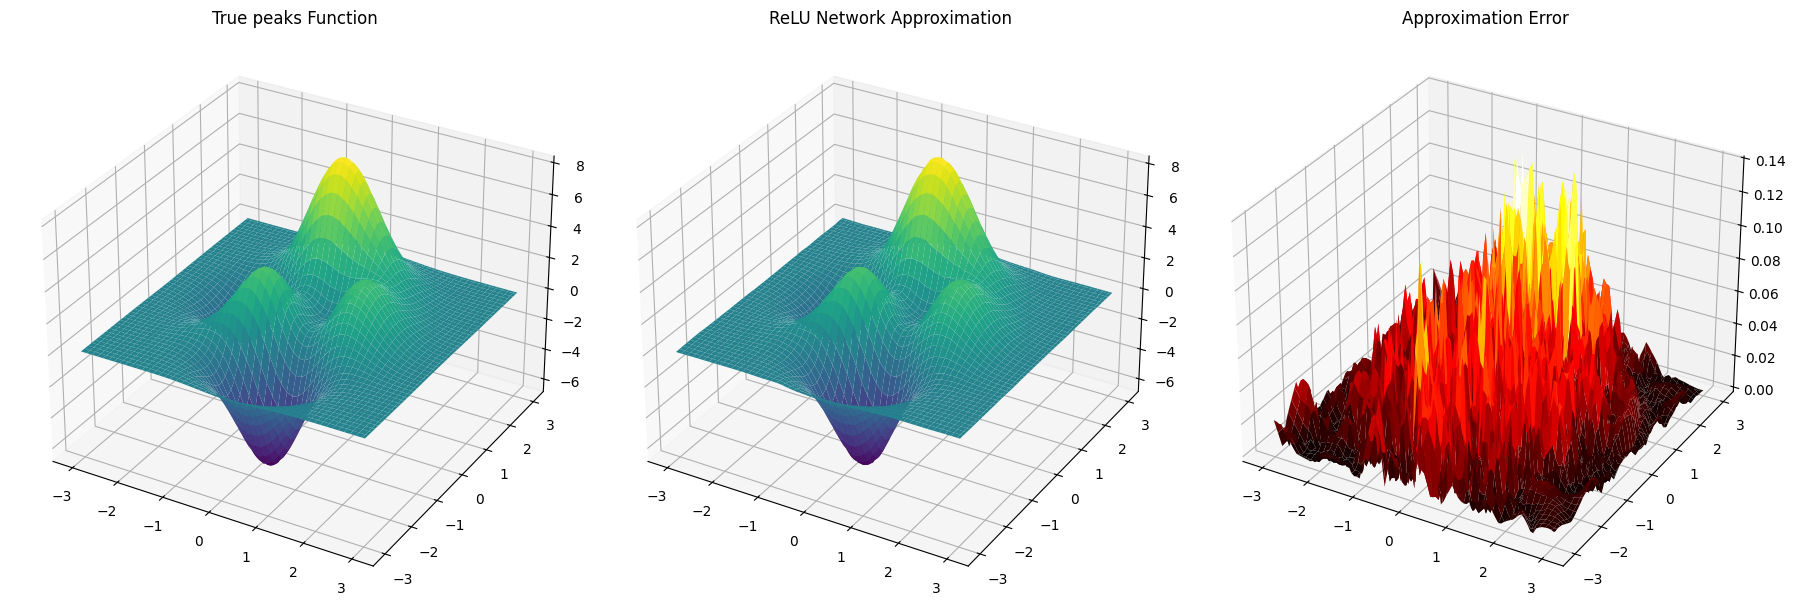


Training on 2D saddle function...
Epoch [200/2000], Loss: 0.0039
Epoch [400/2000], Loss: 0.0031
Epoch [600/2000], Loss: 0.1392
Epoch [800/2000], Loss: 0.0026
Epoch [1000/2000], Loss: 0.0027
Epoch [1200/2000], Loss: 0.0035
Epoch [1400/2000], Loss: 0.0025
Epoch [1600/2000], Loss: 0.0025
Epoch [1800/2000], Loss: 0.0025
Epoch [2000/2000], Loss: 0.0025


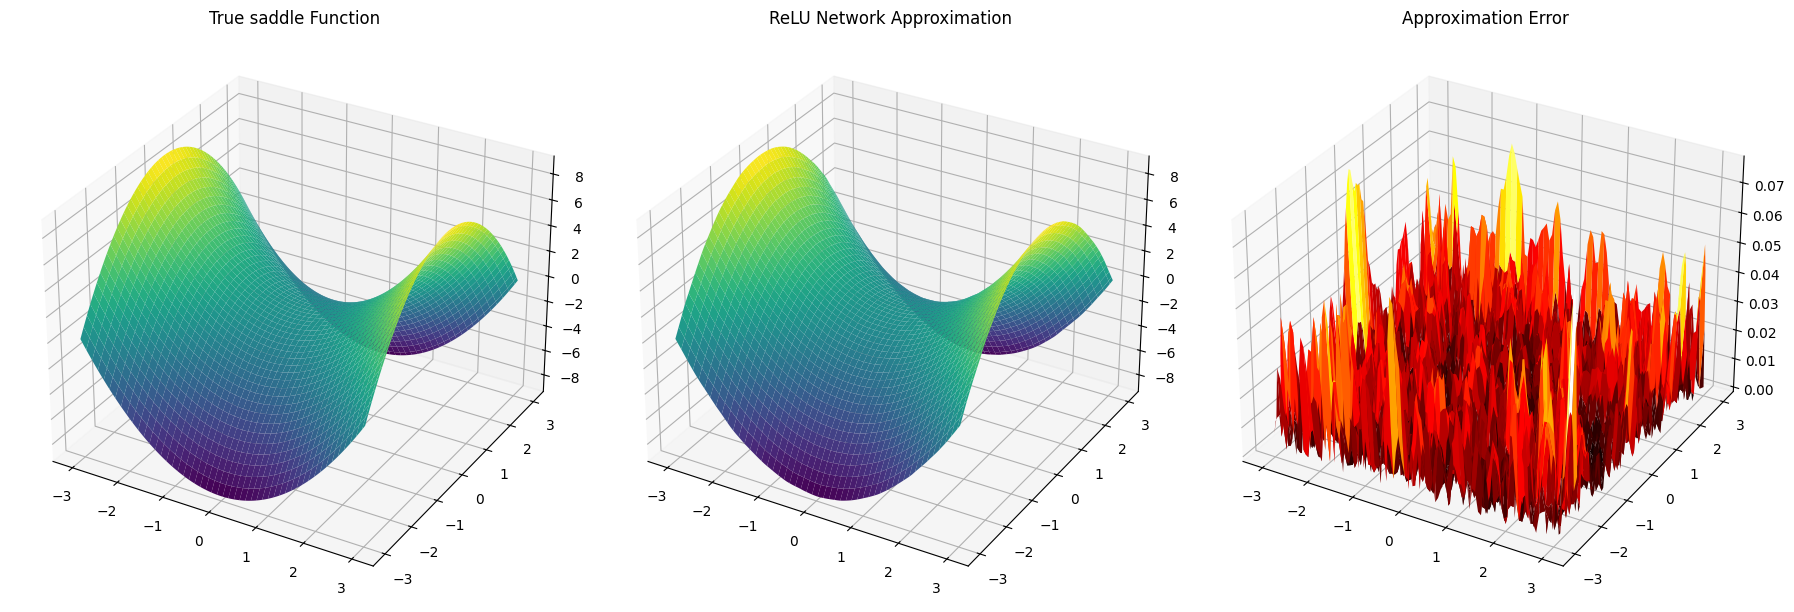


Training on 2D ripple function...
Epoch [200/2000], Loss: 0.0038
Epoch [400/2000], Loss: 0.0038
Epoch [600/2000], Loss: 0.0045
Epoch [800/2000], Loss: 0.0034
Epoch [1000/2000], Loss: 0.0032
Epoch [1200/2000], Loss: 0.0031
Epoch [1400/2000], Loss: 0.0030
Epoch [1600/2000], Loss: 0.0030
Epoch [1800/2000], Loss: 0.0030
Epoch [2000/2000], Loss: 0.0036


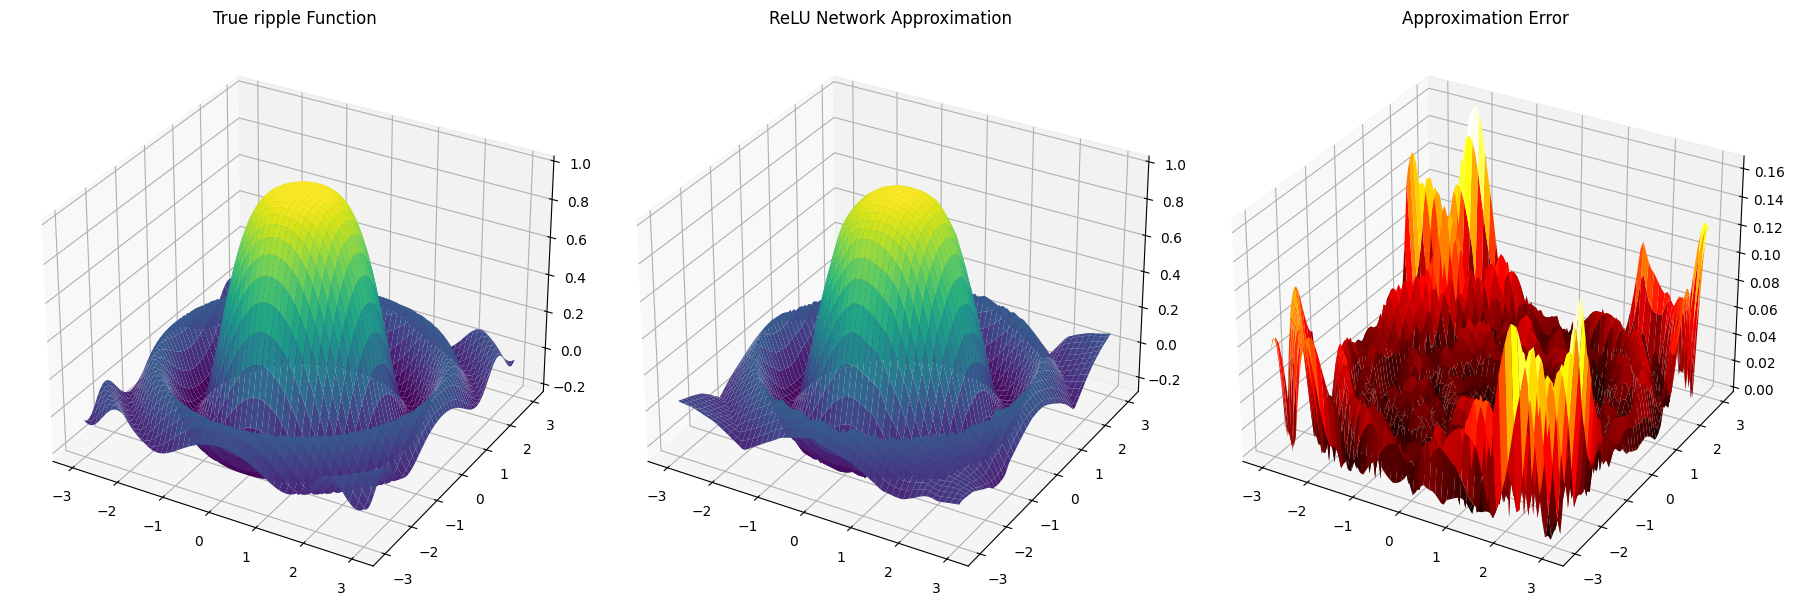

In [4]:
# 二维函数逼近实验
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import torch
import torch.nn as nn
import torch.optim as optim

# 定义二维目标函数
def target_2d_func(x1, x2, func_name='peaks'):
    if func_name == 'peaks':
        return 3*(1-x1)**2 * np.exp(-x1**2 - (x2+1)**2) - 10*(x1/5 - x1**3 - x2**5)*np.exp(-x1**2 - x2**2)
    elif func_name == 'saddle':
        return x1**2 - x2**2
    elif func_name == 'ripple':
        return np.sin(x1**2 + x2**2) / (x1**2 + x2**2 + 1e-6)
    else:
        raise ValueError("Unknown function name")

# 生成二维数据
def generate_2d_data(func_name, n_samples=10000, noise_level=0.05):
    x1 = np.random.uniform(-3, 3, n_samples)
    x2 = np.random.uniform(-3, 3, n_samples)
    y = target_2d_func(x1, x2, func_name)
    y += noise_level * np.random.randn(n_samples)
    return np.column_stack((x1, x2)), y

# 定义ReLU网络
class ReLUNet2D(nn.Module):
    def __init__(self, hidden_size=128, num_layers=3):
        super(ReLUNet2D, self).__init__()
        layers = []
        layers.append(nn.Linear(2, hidden_size))
        layers.append(nn.ReLU())

        for _ in range(num_layers - 2):
            layers.append(nn.Linear(hidden_size, hidden_size))
            layers.append(nn.ReLU())

        layers.append(nn.Linear(hidden_size, 1))
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)

# 训练函数
def train_2d_model(x, y, hidden_size=128, num_layers=4, epochs=2000, lr=0.01):
    x_tensor = torch.FloatTensor(x)
    y_tensor = torch.FloatTensor(y).unsqueeze(1)

    model = ReLUNet2D(hidden_size, num_layers)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(x_tensor)
        loss = criterion(outputs, y_tensor)
        loss.backward()
        optimizer.step()

        if (epoch+1) % 200 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

    return model

# 可视化结果
def plot_2d_results(model, func_name):
    x1 = np.linspace(-3, 3, 100)
    x2 = np.linspace(-3, 3, 100)
    X1, X2 = np.meshgrid(x1, x2)

    # 真实函数
    Y_true = target_2d_func(X1, X2, func_name)

    # 网络预测
    grid_points = np.column_stack((X1.ravel(), X2.ravel()))
    with torch.no_grad():
        Y_pred = model(torch.FloatTensor(grid_points)).numpy().reshape(X1.shape)

    # 绘制结果
    fig = plt.figure(figsize=(18, 6))

    # 真实函数
    ax1 = fig.add_subplot(131, projection='3d')
    ax1.plot_surface(X1, X2, Y_true, cmap='viridis')
    ax1.set_title(f'True {func_name} Function')

    # 网络预测
    ax2 = fig.add_subplot(132, projection='3d')
    ax2.plot_surface(X1, X2, Y_pred, cmap='viridis')
    ax2.set_title('ReLU Network Approximation')

    # 误差
    ax3 = fig.add_subplot(133, projection='3d')
    error = np.abs(Y_true - Y_pred)
    ax3.plot_surface(X1, X2, error, cmap='hot')
    ax3.set_title('Approximation Error')

    plt.tight_layout()
    plt.show()

# 主函数
def main_2d():
    func_names = ['peaks', 'saddle', 'ripple']
    for func_name in func_names:
        print(f"\nTraining on 2D {func_name} function...")
        x, y = generate_2d_data(func_name)
        model = train_2d_model(x, y)
        plot_2d_results(model, func_name)

if __name__ == '__main__':
    main_2d()


Training on discontinuous function...
Epoch [500/3000], Loss: 0.0006
Epoch [1000/3000], Loss: 0.0001
Epoch [1500/3000], Loss: 0.0001
Epoch [2000/3000], Loss: 0.0003
Epoch [2500/3000], Loss: 0.0002
Epoch [3000/3000], Loss: 0.0000


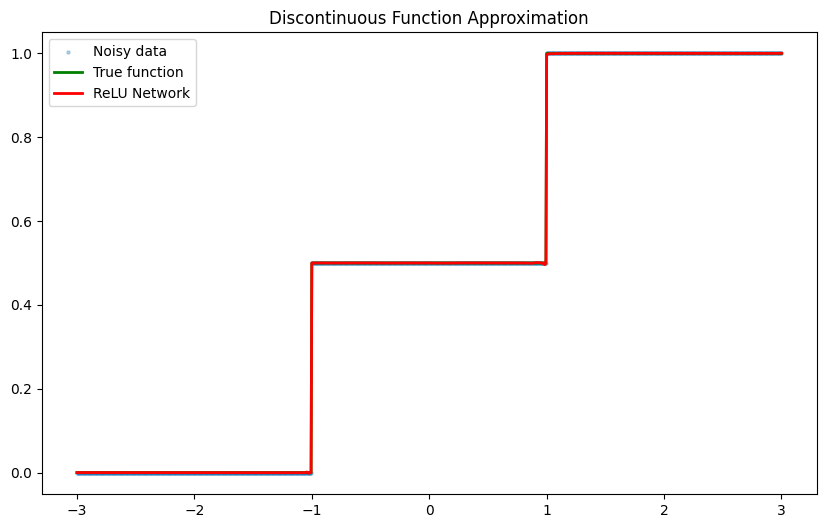

In [9]:
# 不连续函数逼近实验
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

# 定义不连续目标函数
def discontinuous_func(x):
    y = np.zeros_like(x)
    y[x < -1] = 0
    # y[(x >= -1) & (x < 1)] = x[(x >= -1) & (x < 1)]
    y[(x >= -1) & (x < 1)] = 0.5
    y[x >= 1] = 1
    return y

# 生成数据
def generate_discontinuous_data(n_samples=1000, noise_level=0.02):
    x = np.linspace(-3, 3, n_samples)
    y = discontinuous_func(x)
    # y += noise_level * np.random.randn(n_samples)
    return x, y

# 定义更深的ReLU网络
class DeepReLUNet(nn.Module):
    def __init__(self, hidden_size=128, num_layers=3):
        super(DeepReLUNet, self).__init__()
        layers = []
        layers.append(nn.Linear(1, hidden_size))
        layers.append(nn.ReLU())

        for _ in range(num_layers - 2):
            layers.append(nn.Linear(hidden_size, hidden_size))
            layers.append(nn.ReLU())

        layers.append(nn.Linear(hidden_size, 1))
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)

# 训练函数
def train_discontinuous(x, y, hidden_size=128, num_layers=6, epochs=1000, lr=0.01):
    x_tensor = torch.FloatTensor(x).unsqueeze(1)
    y_tensor = torch.FloatTensor(y).unsqueeze(1)

    model = DeepReLUNet(hidden_size, num_layers)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(x_tensor)
        loss = criterion(outputs, y_tensor)
        loss.backward()
        optimizer.step()

        if (epoch+1) % 500 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

    return model

# 可视化结果
def plot_discontinuous_results(x, y, model):
    x_tensor = torch.FloatTensor(x).unsqueeze(1)
    with torch.no_grad():
        y_pred = model(x_tensor).numpy().flatten()

    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, s=5, label='Noisy data', alpha=0.3)
    plt.plot(x, discontinuous_func(x), 'g-', linewidth=2, label='True function')
    plt.plot(x, y_pred, 'r-', linewidth=2, label='ReLU Network')
    plt.title('Discontinuous Function Approximation')
    plt.legend()
    plt.show()

# 主函数
def main_discontinuous():
    print("\nTraining on discontinuous function...")
    x, y = generate_discontinuous_data()
    model = train_discontinuous(x, y)
    plot_discontinuous_results(x, y, model)

if __name__ == '__main__':
    main_discontinuous()